# Dependencies and clean up 

In [10]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import pearsonr

In [11]:
# Store filepath into variable
healthcare_dataset_csv = Path("Data/healthcare_dataset.csv")

In [12]:
# Reading in file.
# adding three boolean columns for all the 3 diseases(0 = 'FALSE', 1 = 'TRUE').
healthcare_dataset_df = pd.read_csv(healthcare_dataset_csv)
healthcare_dataset_df['hypertension_bool'] = healthcare_dataset_df['hypertension'].astype(bool)
healthcare_dataset_df['heart_disease_bool'] = healthcare_dataset_df['heart_disease'].astype(bool)
healthcare_dataset_df['diabetes_bool'] = healthcare_dataset_df['diabetes'].astype(bool)
healthcare_dataset_df.head()

C:\Users\kengt\AppData\Local\Temp\ipykernel_16976\3771533945.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  healthcare_dataset_df = pd.read_csv(healthcare_dataset_csv)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Unnamed: 9,Unnamed: 10,Questions,hypertension_bool,heart_disease_bool,diabetes_bool
0,Female,80.0,0,1,never,25.19,6.6,140,0,NaN,NaN,Is there a correlation between age of the pati...,False,True,False
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,NaN,NaN,Is there a correlation between gender/sex of t...,False,False,False
2,Male,28.0,0,0,never,27.32,5.7,158,0,NaN,NaN,What age group is diabetic?,False,False,False
3,Female,36.0,0,0,current,23.45,5.0,155,0,NaN,NaN,What age group suffers from heart disease and ...,False,False,False
4,Male,76.0,1,1,current,20.14,4.8,155,0,NaN,NaN,Find the correlation between bmi and blood_sug...,True,True,False


In [13]:
#handling missing values
healthcare_dataset_df.isnull().sum()

gender                      0
age                         0
hypertension                0
heart_disease               0
smoking_history             0
bmi                         0
HbA1c_level                 0
blood_glucose_level         0
diabetes                    0
Unnamed: 9             100000
Unnamed: 10            100000
Questions               99993
hypertension_bool           0
heart_disease_bool          0
diabetes_bool               0
dtype: int64

In [14]:
# removing duplicate rows.
healthcare_dataset_df = healthcare_dataset_df.drop_duplicates()

In [15]:
# renaming the Column header Names:
healthcare_dataset_df.columns = healthcare_dataset_df.columns.str.upper()
healthcare_dataset_df.head()

,GENDER,AGE,HYPERTENSION,HEART_DISEASE,SMOKING_HISTORY,BMI,HBA1C_LEVEL,BLOOD_GLUCOSE_LEVEL,DIABETES,UNNAMED: 9,UNNAMED: 10,QUESTIONS,HYPERTENSION_BOOL,HEART_DISEASE_BOOL,DIABETES_BOOL
0,Female,80.0,0,1,never,25.19,6.6,140,0,NaN,NaN,Is there a correlation between age of the pati...,False,True,False
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,NaN,NaN,Is there a correlation between gender/sex of t...,False,False,False
2,Male,28.0,0,0,never,27.32,5.7,158,0,NaN,NaN,What age group is diabetic?,False,False,False
3,Female,36.0,0,0,current,23.45,5.0,155,0,NaN,NaN,What age group suffers from heart disease and ...,False,False,False
4,Male,76.0,1,1,current,20.14,4.8,155,0,NaN,NaN,Find the correlation between bmi and blood_sug...,True,True,False


In [16]:
# Converting Data Types:
healthcare_dataset_df['AGE'] = healthcare_dataset_df['AGE'].astype(int)
healthcare_dataset_df['BLOOD_GLUCOSE_LEVEL'] = healthcare_dataset_df['BLOOD_GLUCOSE_LEVEL'].astype(float)
healthcare_dataset_df.head()

,GENDER,AGE,HYPERTENSION,HEART_DISEASE,SMOKING_HISTORY,BMI,HBA1C_LEVEL,BLOOD_GLUCOSE_LEVEL,DIABETES,UNNAMED: 9,UNNAMED: 10,QUESTIONS,HYPERTENSION_BOOL,HEART_DISEASE_BOOL,DIABETES_BOOL
0,Female,80,0,1,never,25.19,6.6,140.0,0,NaN,NaN,Is there a correlation between age of the pati...,False,True,False
1,Female,54,0,0,No Info,27.32,6.6,80.0,0,NaN,NaN,Is there a correlation between gender/sex of t...,False,False,False
2,Male,28,0,0,never,27.32,5.7,158.0,0,NaN,NaN,What age group is diabetic?,False,False,False
3,Female,36,0,0,current,23.45,5.0,155.0,0,NaN,NaN,What age group suffers from heart disease and ...,False,False,False
4,Male,76,1,1,current,20.14,4.8,155.0,0,NaN,NaN,Find the correlation between bmi and blood_sug...,True,True,False


# Correlation between each disease and age

In [17]:
# Calculate correlation coefficient between age and hypertension
correlation_age_hypertension, _ = pearsonr(healthcare_dataset_df['AGE'], healthcare_dataset_df['HYPERTENSION_BOOL'])
print(f"Correlation between age and hypertension_bool is : {correlation_age_hypertension:.2f}")

Correlation between age and hypertension_bool is : 0.26


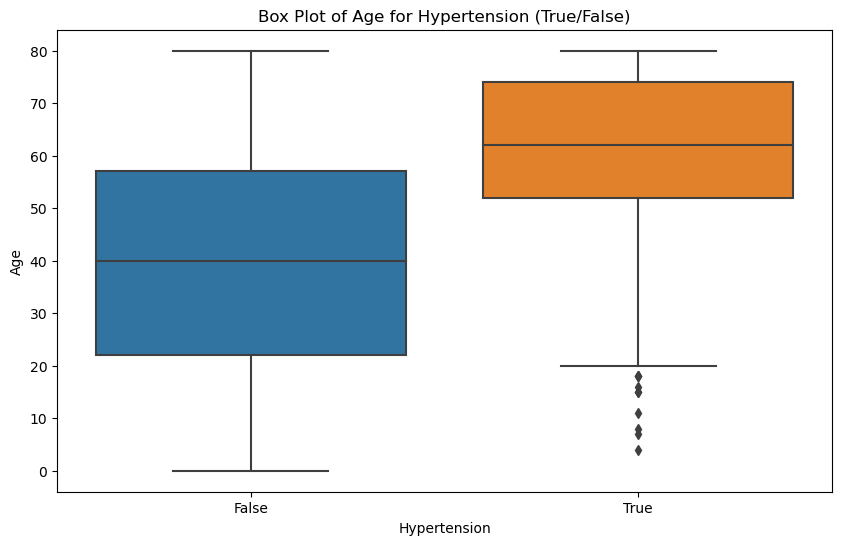

In [18]:

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='HYPERTENSION_BOOL', y='AGE', data=healthcare_dataset_df)
plt.title('Box Plot of Age for Hypertension (True/False)')
plt.xlabel('Hypertension')
plt.ylabel('Age')
plt.show()


In [19]:
# Calculate correlation coefficient between age and heart_disease
correlation_age_heart_disease, _ = pearsonr(healthcare_dataset_df['AGE'], healthcare_dataset_df['HEART_DISEASE_BOOL'])
print(f"Correlation between age and heart disease is : {correlation_age_heart_disease:.2f}")

Correlation between age and heart disease is : 0.24


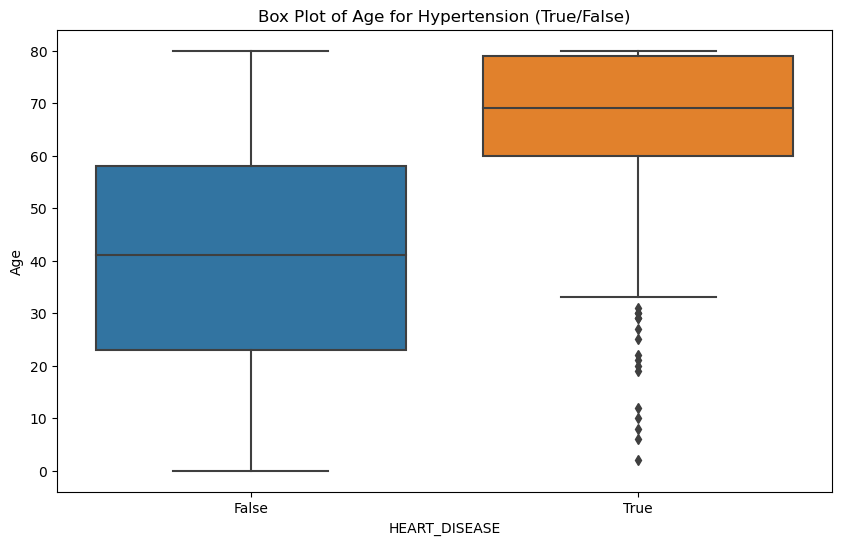

In [20]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='HEART_DISEASE_BOOL', y='AGE', data=healthcare_dataset_df)
plt.title('Box Plot of Age for Hypertension (True/False)')
plt.xlabel('HEART_DISEASE')
plt.ylabel('Age')
plt.show()

# Pie chart of 60+ only, percent true or false for each disease

In [21]:
# Create dataframe with only patients over 60
over_60_df = healthcare_dataset_df.loc[healthcare_dataset_df['AGE'] >= 60]
over_60_df.head()


,GENDER,AGE,HYPERTENSION,HEART_DISEASE,SMOKING_HISTORY,BMI,HBA1C_LEVEL,BLOOD_GLUCOSE_LEVEL,DIABETES,UNNAMED: 9,UNNAMED: 10,QUESTIONS,HYPERTENSION_BOOL,HEART_DISEASE_BOOL,DIABETES_BOOL
0,Female,80,0,1,never,25.19,6.6,140.0,0,NaN,NaN,Is there a correlation between age of the pati...,False,True,False
4,Male,76,1,1,current,20.14,4.8,155.0,0,NaN,NaN,Find the correlation between bmi and blood_sug...,True,True,False
7,Female,79,0,0,No Info,23.86,5.7,85.0,0,NaN,NaN,NaN,False,False,False
12,Female,78,0,0,former,36.05,5.0,130.0,0,NaN,NaN,NaN,False,False,False
13,Female,67,0,0,never,25.69,5.8,200.0,0,NaN,NaN,NaN,False,False,False


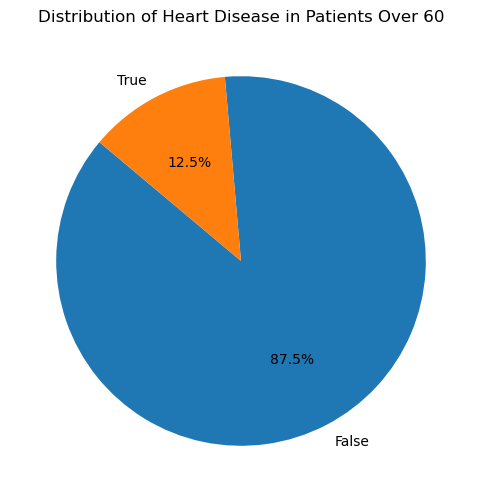

HEART_DISEASE_BOOL
False    20979
True      2996
Name: count, dtype: int64

In [22]:
# Distribution of heart disease in patients over 60
heart_disease_over_60 = over_60_df['HEART_DISEASE_BOOL'].value_counts()

# Pie chart
plt.figure(figsize=(10, 6))
plt.pie(heart_disease_over_60, labels=heart_disease_over_60.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Heart Disease in Patients Over 60')
plt.show()

heart_disease_over_60


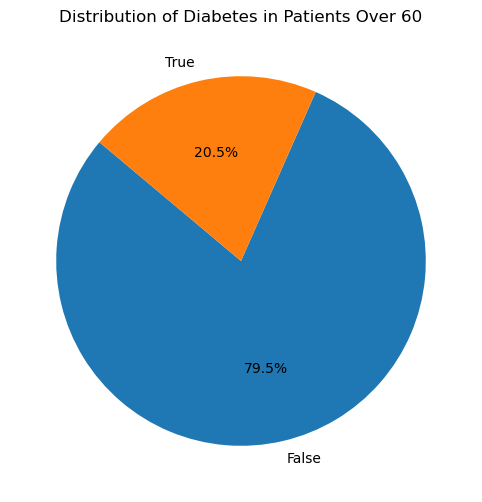

DIABETES_BOOL
False    19057
True      4918
Name: count, dtype: int64

In [23]:
# Distribution of diabetes in patients over 60
diabetes_over_60 = over_60_df['DIABETES_BOOL'].value_counts()

# Pie chart
plt.figure(figsize=(10, 6))
plt.pie(diabetes_over_60, labels=diabetes_over_60.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diabetes in Patients Over 60')
plt.show()

diabetes_over_60


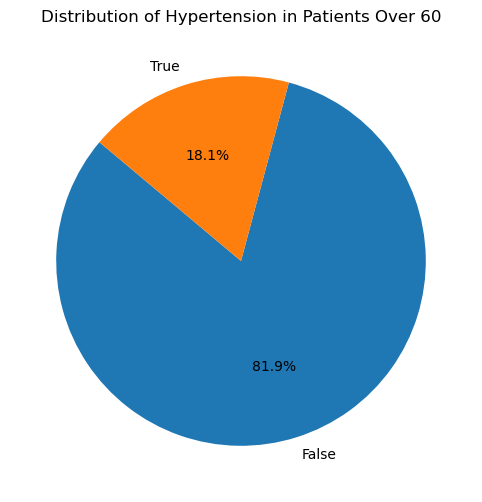

HYPERTENSION_BOOL
False    19645
True      4330
Name: count, dtype: int64

In [24]:
# Distribution of diabetes in Hypertension over 60
hypertension_over_60 = over_60_df['HYPERTENSION_BOOL'].value_counts()

# Pie chart
plt.figure(figsize=(10, 6))
plt.pie(hypertension_over_60, labels=hypertension_over_60.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Hypertension in Patients Over 60')
plt.show()

hypertension_over_60

In [25]:
# Distribution of having any of the 3 diseases in patients over 60
# Create a dataframe with a new column 'ANY_DISEASE' that is True if the patient has any of the 3 diseases
over_60_df['ANY_DISEASE'] = over_60_df['HYPERTENSION_BOOL'] | over_60_df['HEART_DISEASE_BOOL'] | over_60_df['DIABETES_BOOL']
any_disease_over_60 = over_60_df['ANY_DISEASE'].value_counts()
over_60_df.head()

C:\Users\kengt\AppData\Local\Temp\ipykernel_16976\2726607527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over_60_df['ANY_DISEASE'] = over_60_df['HYPERTENSION_BOOL'] | over_60_df['HEART_DISEASE_BOOL'] | over_60_df['DIABETES_BOOL']


,GENDER,AGE,HYPERTENSION,HEART_DISEASE,SMOKING_HISTORY,BMI,HBA1C_LEVEL,BLOOD_GLUCOSE_LEVEL,DIABETES,UNNAMED: 9,UNNAMED: 10,QUESTIONS,HYPERTENSION_BOOL,HEART_DISEASE_BOOL,DIABETES_BOOL,ANY_DISEASE
0,Female,80,0,1,never,25.19,6.6,140.0,0,NaN,NaN,Is there a correlation between age of the pati...,False,True,False,True
4,Male,76,1,1,current,20.14,4.8,155.0,0,NaN,NaN,Find the correlation between bmi and blood_sug...,True,True,False,True
7,Female,79,0,0,No Info,23.86,5.7,85.0,0,NaN,NaN,NaN,False,False,False,False
12,Female,78,0,0,former,36.05,5.0,130.0,0,NaN,NaN,NaN,False,False,False,False
13,Female,67,0,0,never,25.69,5.8,200.0,0,NaN,NaN,NaN,False,False,False,False


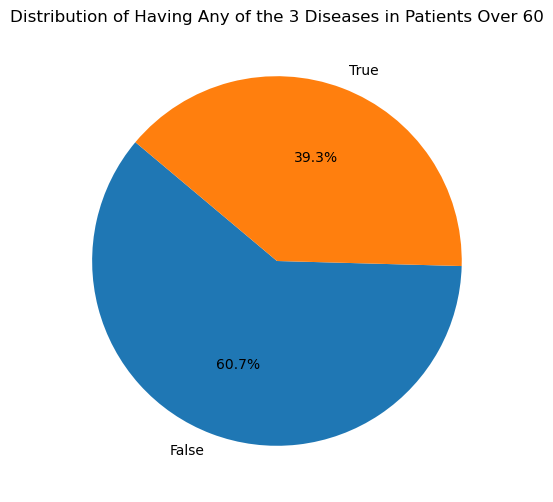

In [26]:
# Display a pie chart of the distribution of having any of the 3 diseases in patients over 60
plt.figure(figsize=(10, 6))
plt.pie(any_disease_over_60, labels=any_disease_over_60.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Having Any of the 3 Diseases in Patients Over 60')
plt.show()


In [ ]:
# Distribution of having all 3 diseases in patients under 60

# What's the correlation between smoking history and the three diseases?

In [27]:
# Remove rows with 'No Info' in smoking_status column
healthcare_dataset_smoke_df = healthcare_dataset_df[healthcare_dataset_df['SMOKING_HISTORY'] != 'No Info']
healthcare_dataset_smoke_df.head()

,GENDER,AGE,HYPERTENSION,HEART_DISEASE,SMOKING_HISTORY,BMI,HBA1C_LEVEL,BLOOD_GLUCOSE_LEVEL,DIABETES,UNNAMED: 9,UNNAMED: 10,QUESTIONS,HYPERTENSION_BOOL,HEART_DISEASE_BOOL,DIABETES_BOOL
0,Female,80,0,1,never,25.19,6.6,140.0,0,NaN,NaN,Is there a correlation between age of the pati...,False,True,False
2,Male,28,0,0,never,27.32,5.7,158.0,0,NaN,NaN,What age group is diabetic?,False,False,False
3,Female,36,0,0,current,23.45,5.0,155.0,0,NaN,NaN,What age group suffers from heart disease and ...,False,False,False
4,Male,76,1,1,current,20.14,4.8,155.0,0,NaN,NaN,Find the correlation between bmi and blood_sug...,True,True,False
5,Female,20,0,0,never,27.32,6.6,85.0,0,NaN,NaN,What's the correlation between HbA1c level and...,False,False,False


In [28]:
# Calculate correlation coefficient between smoking history and (diabetes) 
correlation_smoking_diabetes_never, _ = pearsonr(healthcare_dataset_smoke_df['SMOKING_HISTORY'] == 'never', healthcare_dataset_smoke_df['DIABETES_BOOL'])
correlation_smoking_diabetes_current, _ = pearsonr(healthcare_dataset_smoke_df['SMOKING_HISTORY'] == 'current', healthcare_dataset_smoke_df['DIABETES_BOOL'])
correlation_smoking_diabetes_former, _ = pearsonr(healthcare_dataset_smoke_df['SMOKING_HISTORY'] == 'former', healthcare_dataset_smoke_df['DIABETES_BOOL'])
correlation_smoking_diabetes_ever, _ = pearsonr(healthcare_dataset_smoke_df['SMOKING_HISTORY'] == 'ever', healthcare_dataset_smoke_df['DIABETES_BOOL'])
correlation_smoking_diabetes_not_current, _ = pearsonr(healthcare_dataset_smoke_df['SMOKING_HISTORY'] == 'not current', healthcare_dataset_smoke_df['DIABETES_BOOL'])


print(f"Correlation between a 'Never'smoking history and diabetes is : {correlation_smoking_diabetes_never:.4f}")
print(f"Correlation between a 'current'smoking history and diabetes is : {correlation_smoking_diabetes_current:.4f}")
print(f"Correlation between a 'former'smoking history and diabetes is : {correlation_smoking_diabetes_former:.4f}")
print(f"Correlation between a 'ever'smoking history and diabetes is : {correlation_smoking_diabetes_ever:.4f}")
print(f"Correlation between a 'not current'smoking history and diabetes is : {correlation_smoking_diabetes_not_current:.4f}")

Correlation between a 'Never'smoking history and diabetes is : -0.0494
Correlation between a 'current'smoking history and diabetes is : -0.0107
Correlation between a 'former'smoking history and diabetes is : 0.0789
Correlation between a 'ever'smoking history and diabetes is : 0.0056
Correlation between a 'not current'smoking history and diabetes is : -0.0031


In [29]:
# Calculate correlation coefficient between smoking history and (hypertension)
correlation_smoking_hypertension_never, _ = pearsonr(healthcare_dataset_smoke_df['SMOKING_HISTORY'] == 'never', healthcare_dataset_smoke_df['HYPERTENSION_BOOL'])
correlation_smoking_hypertension_current, _ = pearsonr(healthcare_dataset_smoke_df['SMOKING_HISTORY'] == 'current', healthcare_dataset_smoke_df['HYPERTENSION_BOOL'])
correlation_smoking_hypertension_former, _ = pearsonr(healthcare_dataset_smoke_df['SMOKING_HISTORY'] == 'former', healthcare_dataset_smoke_df['HYPERTENSION_BOOL'])
correlation_smoking_hypertension_ever, _ = pearsonr(healthcare_dataset_smoke_df['SMOKING_HISTORY'] == 'ever', healthcare_dataset_smoke_df['HYPERTENSION_BOOL'])
correlation_smoking_hypertension_not_current, _ = pearsonr(healthcare_dataset_smoke_df['SMOKING_HISTORY'] == 'not current', healthcare_dataset_smoke_df['HYPERTENSION_BOOL'])


print(f"Correlation between a 'Never'smoking history and hypertension is : {correlation_smoking_hypertension_never:.4f}")
print(f"Correlation between a 'current'smoking history and hypertension is : {correlation_smoking_hypertension_current:.4f}")
print(f"Correlation between a 'former'smoking history and hypertension is : {correlation_smoking_hypertension_former:.4f}")
print(f"Correlation between a 'ever'smoking history and hypertension is : {correlation_smoking_hypertension_ever:.4f}")
print(f"Correlation between a 'not current'smoking history and hypertension is : {correlation_smoking_hypertension_not_current:.4f}")

Correlation between a 'Never'smoking history and hypertension is : -0.0229
Correlation between a 'current'smoking history and hypertension is : -0.0119
Correlation between a 'former'smoking history and hypertension is : 0.0620
Correlation between a 'ever'smoking history and hypertension is : 0.0049
Correlation between a 'not current'smoking history and hypertension is : -0.0252


In [30]:
# Calculate correlation coefficient between smoking history and (heart disease)
correlation_smoking_hypertension_never, _ = pearsonr(healthcare_dataset_smoke_df['SMOKING_HISTORY'] == 'never', healthcare_dataset_smoke_df['HEART_DISEASE_BOOL'])
correlation_smoking_hypertension_current, _ = pearsonr(healthcare_dataset_smoke_df['SMOKING_HISTORY'] == 'current', healthcare_dataset_smoke_df['HEART_DISEASE_BOOL'])
correlation_smoking_hypertension_former, _ = pearsonr(healthcare_dataset_smoke_df['SMOKING_HISTORY'] == 'former', healthcare_dataset_smoke_df['HEART_DISEASE_BOOL'])
correlation_smoking_hypertension_ever, _ = pearsonr(healthcare_dataset_smoke_df['SMOKING_HISTORY'] == 'ever', healthcare_dataset_smoke_df['HEART_DISEASE_BOOL'])
correlation_smoking_hypertension_not_current, _ = pearsonr(healthcare_dataset_smoke_df['SMOKING_HISTORY'] == 'not current', healthcare_dataset_smoke_df['HEART_DISEASE_BOOL'])


print(f"Correlation between a 'Never'smoking history and heart disease is : {correlation_smoking_hypertension_never:.4f}")
print(f"Correlation between a 'current'smoking history and heart disease is : {correlation_smoking_hypertension_current:.4f}")
print(f"Correlation between a 'former'smoking history and heart disease is : {correlation_smoking_hypertension_former:.4f}")
print(f"Correlation between a 'ever'smoking history and heart disease is : {correlation_smoking_hypertension_ever:.4f}")
print(f"Correlation between a 'not current'smoking history and heart disease is : {correlation_smoking_hypertension_not_current:.4f}")

Correlation between a 'Never'smoking history and heart disease is : -0.0810
Correlation between a 'current'smoking history and heart disease is : -0.0062
Correlation between a 'former'smoking history and heart disease is : 0.0969
Correlation between a 'ever'smoking history and heart disease is : 0.0373
Correlation between a 'not current'smoking history and heart disease is : -0.0029


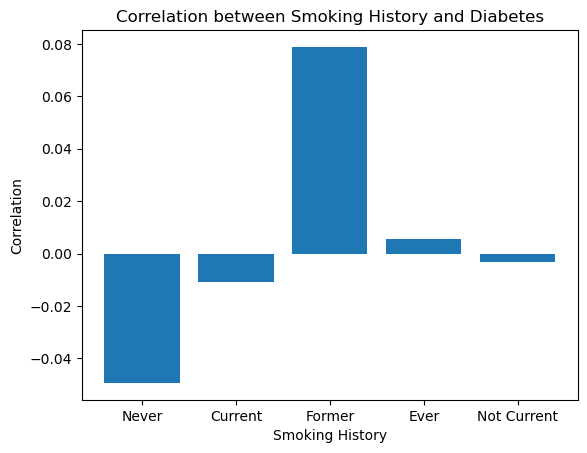

In [31]:
# Display bar chart of correlation between smoking history and (diabetes)
smoking_diabetes_corr_y = [correlation_smoking_diabetes_never, correlation_smoking_diabetes_current, correlation_smoking_diabetes_former, correlation_smoking_diabetes_ever, correlation_smoking_diabetes_not_current]
smoking_diabetes_corr_x = ['Never', 'Current', 'Former', 'Ever', 'Not Current']
plt.bar(smoking_diabetes_corr_x, smoking_diabetes_corr_y)
plt.title('Correlation between Smoking History and Diabetes')
plt.xlabel('Smoking History')
plt.ylabel('Correlation')
plt.show()

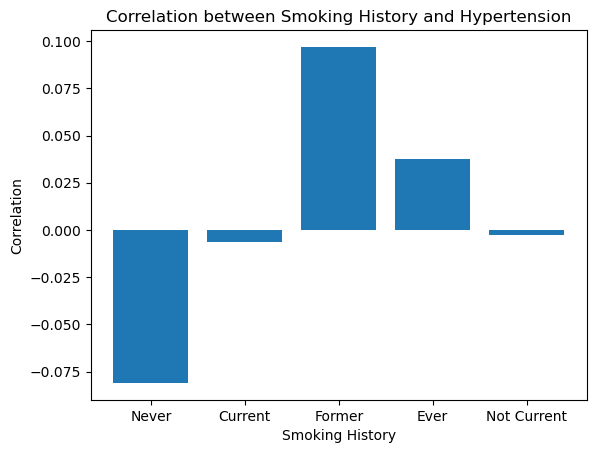

In [32]:
# Display bar chart of correlation between smoking history and (hypertension)
smoking_hypertension_corr_y = [correlation_smoking_hypertension_never, correlation_smoking_hypertension_current, correlation_smoking_hypertension_former, correlation_smoking_hypertension_ever, correlation_smoking_hypertension_not_current]
smoking_hypertension_corr_x = ['Never', 'Current', 'Former', 'Ever', 'Not Current']
plt.bar(smoking_hypertension_corr_x, smoking_hypertension_corr_y)
plt.title('Correlation between Smoking History and Hypertension')
plt.xlabel('Smoking History')
plt.ylabel('Correlation')
plt.show()

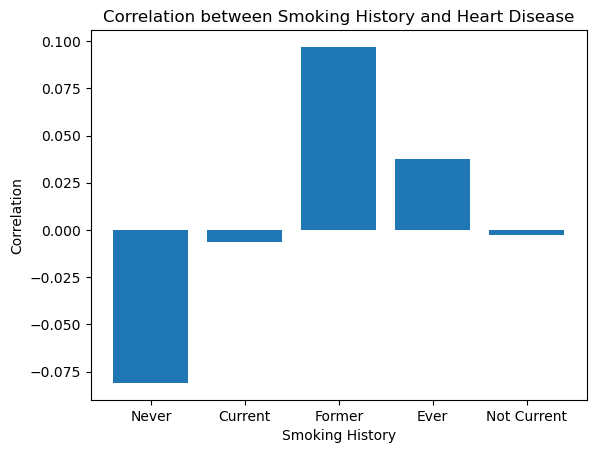

In [33]:
# Display bar chart of correlation between smoking history and (heart disease)
smoking_heart_disease_corr_y = [correlation_smoking_hypertension_never, correlation_smoking_hypertension_current, correlation_smoking_hypertension_former, correlation_smoking_hypertension_ever, correlation_smoking_hypertension_not_current]
smoking_heart_disease_corr_x = ['Never', 'Current', 'Former', 'Ever', 'Not Current']
plt.bar(smoking_heart_disease_corr_x, smoking_heart_disease_corr_y)
plt.title('Correlation between Smoking History and Heart Disease')
plt.xlabel('Smoking History')
plt.ylabel('Correlation')
plt.show()

# Look into the "Former" Smokers. Look at the age distribution

# Create new 'ANY_DISEASE' Column to track how many likely it is for 60+ patients to have any of the 3 diseses 

In [45]:
# Create a dataframe with a new column 'ANY_DISEASE' that is True if the patient has any of the 3 diseases
healthcare_dataset_df['ANY_DISEASE'] = healthcare_dataset_df['HYPERTENSION_BOOL'] | healthcare_dataset_df['HEART_DISEASE_BOOL'] | healthcare_dataset_df['DIABETES_BOOL']
any_disease_count = healthcare_dataset_df['ANY_DISEASE'].value_counts()
healthcare_dataset_df.head()

print(any_disease_count)

any_disease_count_true = any_disease_count[True]
any_disease_count_false = any_disease_count[False]
total_responses_any_disease = any_disease_count_true + any_disease_count_false
percentage_affected = (any_disease_count_true / total_responses_any_disease) * 100
print(f'{percentage_affected:.2f}% of the population will suffer from at least one of the 3 diseases')

# Corelation between age and any disease
correlation_age_any_disease, _ = pearsonr(healthcare_dataset_df['AGE'], healthcare_dataset_df['ANY_DISEASE'])
print(f"Correlation between age and any disease is : {correlation_age_any_disease:.2f}")


# calculate how many people in the dataset will suffer from at least one of the 3 diseases
total_az_pop_affected_number = round((percentage_affected/100) * total_population).iloc[0]
formatted_number = "{:,}".format(total_az_pop_affected_number)
print(f'{formatted_number} people in the dataset are suffering from at least one of the 3 diseases')




ANY_DISEASE
False    80191
True     15956
Name: count, dtype: int64
16.60% of the population will suffer from at least one of the 3 diseases
Correlation between age and any disease is : 0.40
1,190,270.0 people in the dataset are suffering from at least one of the 3 diseases


# Census API

In [34]:
# Import U.S. Census API Key
from census import Census
from config import api_key

# Create an instance of the Census library
c = Census(
    api_key,
    year = 2022
)


In [35]:
# Get Arizona's total population data
az_pop = c.acs5.get(('NAME', 'B01003_001E'), {'for': 'state:04'})

# 'NAME' is the name of the state
# 'B01003_001E' is the Census code for total population
# 'for': 'state:04' means get data for Arizona (state code 04)

# Print the data
for data in az_pop:
    print(data)

{'NAME': 'Arizona', 'B01003_001E': 7172282.0, 'state': '04'}


# Gather census data. Create pie chart of how over 60, histogram of different age groups. 

In [36]:
# Get Arizona's total population data broken down by age
az_pop_age = c.acs5.get(('NAME', 'B01001_001E', 'B01001_003E', 'B01001_004E', 'B01001_005E', 'B01001_006E', 
                         'B01001_007E', 'B01001_008E', 'B01001_009E', 'B01001_010E', 'B01001_011E', 'B01001_012E', 
                         'B01001_013E', 'B01001_014E', 'B01001_015E', 'B01001_016E', 'B01001_017E', 'B01001_018E', 
                         'B01001_019E', 'B01001_020E', 'B01001_021E', 'B01001_022E', 'B01001_023E', 'B01001_024E', 
                         'B01001_025E', 'B01001_026E', 'B01001_027E', 'B01001_028E', 'B01001_029E', 'B01001_030E', 
                         'B01001_031E', 'B01001_032E', 'B01001_033E', 'B01001_034E', 'B01001_035E', 'B01001_036E', 
                         'B01001_037E', 'B01001_038E', 'B01001_039E', 'B01001_040E', 'B01001_041E', 'B01001_042E', 
                         'B01001_043E', 'B01001_044E', 'B01001_045E', 'B01001_046E', 'B01001_047E', 'B01001_048E', 
                         'B01001_049E'), {'for': 'state:04'})

# 'NAME' is the name of the state
# 'B01001_001E' is the Census code for total population
# 'B01001_003E' to 'B01001_049E' are the Census codes for population by age for both genders
# 'B01001_003E' to 'B01001_034E' are for men 
# 'B01001_035E' to 'B01001_049E' are for women
# 'for': 'state:04' means get data for Arizona (state code 04)

# Print the data
for data in az_pop_age:
    print(data)



{'NAME': 'Arizona', 'B01001_001E': 7172282.0, 'B01001_003E': 205506.0, 'B01001_004E': 221355.0, 'B01001_005E': 242733.0, 'B01001_006E': 145090.0, 'B01001_007E': 101385.0, 'B01001_008E': 52029.0, 'B01001_009E': 52269.0, 'B01001_010E': 156625.0, 'B01001_011E': 261182.0, 'B01001_012E': 250072.0, 'B01001_013E': 234511.0, 'B01001_014E': 225164.0, 'B01001_015E': 212848.0, 'B01001_016E': 210406.0, 'B01001_017E': 210627.0, 'B01001_018E': 87600.0, 'B01001_019E': 120944.0, 'B01001_020E': 76469.0, 'B01001_021E': 107601.0, 'B01001_022E': 167052.0, 'B01001_023E': 119461.0, 'B01001_024E': 72420.0, 'B01001_025E': 55161.0, 'B01001_026E': 3583772.0, 'B01001_027E': 197130.0, 'B01001_028E': 213059.0, 'B01001_029E': 231081.0, 'B01001_030E': 137509.0, 'B01001_031E': 96851.0, 'B01001_032E': 46454.0, 'B01001_033E': 49681.0, 'B01001_034E': 144566.0, 'B01001_035E': 240180.0, 'B01001_036E': 231283.0, 'B01001_037E': 221818.0, 'B01001_038E': 213121.0, 'B01001_039E': 208728.0, 'B01001_040E': 209063.0, 'B01001_041E

In [37]:
# Create a dataframe from the population data
az_pop_age_df = pd.DataFrame(az_pop_age)

# Change the column names
az_pop_age_df = az_pop_age_df.rename(columns={
    'B01001_001E': 'Total population',
    'B01001_002E': 'Male: Total',
    'B01001_003E': 'Male: Under 5 years',
    'B01001_004E': 'Male: 5 to 9 years',
    'B01001_005E': 'Male: 10 to 14 years',
    'B01001_006E': 'Male: 15 to 17 years',
    'B01001_007E': 'Male: 18 and 19 years',
    'B01001_008E': 'Male: 20 years',
    'B01001_009E': 'Male: 21 years',
    'B01001_010E': 'Male: 22 to 24 years',
    'B01001_011E': 'Male: 25 to 29 years',
    'B01001_012E': 'Male: 30 to 34 years',
    'B01001_013E': 'Male: 35 to 39 years',
    'B01001_014E': 'Male: 40 to 44 years',
    'B01001_015E': 'Male: 45 to 49 years',
    'B01001_016E': 'Male: 50 to 54 years',
    'B01001_017E': 'Male: 55 to 59 years',
    'B01001_018E': 'Male: 60 and 61 years',
    'B01001_019E': 'Male: 62 to 64 years',
    'B01001_020E': 'Male: 65 and 66 years',
    'B01001_021E': 'Male: 67 to 69 years',
    'B01001_022E': 'Male: 70 to 74 years',
    'B01001_023E': 'Male: 75 to 79 years',
    'B01001_024E': 'Male: 80 to 84 years',
    'B01001_025E': 'Male: 85 years and over',
    'B01001_026E': 'Female: Total',
    'B01001_027E': 'Female: Under 5 years',
    'B01001_028E': 'Female: 5 to 9 years',
    'B01001_029E': 'Female: 10 to 14 years',
    'B01001_030E': 'Female: 15 to 17 years',
    'B01001_031E': 'Female: 18 and 19 years',
    'B01001_032E': 'Female: 20 years',
    'B01001_033E': 'Female: 21 years',
    'B01001_034E': 'Female: 22 to 24 years',
    'B01001_035E': 'Female: 25 to 29 years',
    'B01001_036E': 'Female: 30 to 34 years',
    'B01001_037E': 'Female: 35 to 39 years',
    'B01001_038E': 'Female: 40 to 44 years',
    'B01001_039E': 'Female: 45 to 49 years',
    'B01001_040E': 'Female: 50 to 54 years',
    'B01001_041E': 'Female: 55 to 59 years',
    'B01001_042E': 'Female: 60 and 61 years',
    'B01001_043E': 'Female: 62 to 64 years',
    'B01001_044E': 'Female: 65 and 66 years',
    'B01001_045E': 'Female: 67 to 69 years',
    'B01001_046E': 'Female: 70 to 74 years',
    'B01001_047E': 'Female: 75 to 79 years',
    'B01001_048E': 'Female: 80 to 84 years',
    'B01001_049E': 'Female: 85 years and over'
})

# Display the dataframe
az_pop_age_df.head()

# Create a csv file from the dataframe
# az_pop_age_df.to_csv('Data/az_population_by_age.csv', index=False)


,NAME,Total population,Male: Under 5 years,Male: 5 to 9 years,Male: 10 to 14 years,Male: 15 to 17 years,Male: 18 and 19 years,Male: 20 years,Male: 21 years,Male: 22 to 24 years,...,Female: 55 to 59 years,Female: 60 and 61 years,Female: 62 to 64 years,Female: 65 and 66 years,Female: 67 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 years and over,state
0,Arizona,7172282.0,205506.0,221355.0,242733.0,145090.0,101385.0,52029.0,52269.0,156625.0,...,217963.0,90758.0,134889.0,85320.0,127490.0,183264.0,135584.0,84246.0,83734.0,04


In [43]:
# Create Dataframe for the age group 60 and over
az_pop_age_60_df = az_pop_age_df[['Male: 60 and 61 years', 'Male: 62 to 64 years', 
                                  'Male: 65 and 66 years', 'Male: 67 to 69 years', 
                                  'Male: 70 to 74 years', 'Male: 75 to 79 years', 
                                  'Male: 80 to 84 years', 'Male: 85 years and over',
                                  'Female: 60 and 61 years', 'Female: 62 to 64 years',
                                  'Female: 65 and 66 years', 'Female: 67 to 69 years',
                                  'Female: 70 to 74 years', 'Female: 75 to 79 years',
                                  'Female: 80 to 84 years', 'Female: 85 years and over']]
az_pop_age_60_df

# Sum of males over 60
male_over_60 = az_pop_age_60_df[['Male: 60 and 61 years', 'Male: 62 to 64 years', 
                              'Male: 65 and 66 years', 'Male: 67 to 69 years', 
                              'Male: 70 to 74 years', 'Male: 75 to 79 years', 
                              'Male: 80 to 84 years', 'Male: 85 years and over']].sum().sum()
print(f'The population of females over 60 in AZ is {male_over_60}')

# Sum of females over 60
female_over_60 = az_pop_age_60_df[['Female: 65 and 66 years', 'Female: 67 to 69 years',
                                  'Female: 70 to 74 years', 'Female: 75 to 79 years',
                                  'Female: 80 to 84 years', 'Female: 85 years and over']].sum().sum()
print(f'The population of females over 60 in AZ is {female_over_60}')

# Total population over 60
total_over = int(female_over_60 + male_over_60)
print(f'The total population over 60 in AZ is {total_over}')

# Total population in AZ
total_population = az_pop_age_df['Total population']
print(f'The total population in AZ is {total_population}')

# Total population under 60
total_under = int(total_population - total_over)
print(f'The total population under 60 in AZ is {total_under}')




The population of females over 60 in AZ is 806708.0
The population of females over 60 in AZ is 699638.0
The total population over 60 in AZ is 1506346
The total population in AZ is 0    7172282.0
Name: Total population, dtype: float64
The total population under 60 in AZ is 5665936


C:\Users\kengt\AppData\Local\Temp\ipykernel_16976\37413100.py:34: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  total_under = int(total_population - total_over)


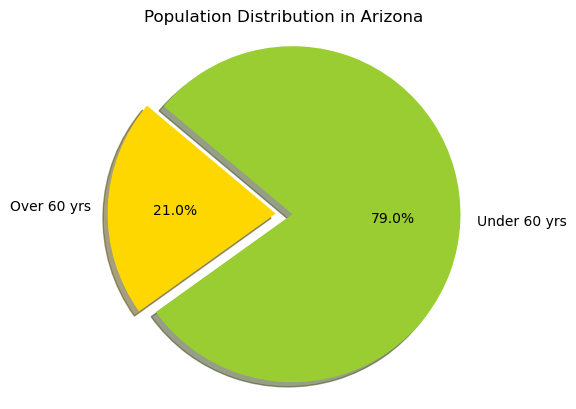

In [39]:
# Create a pie chart of 

# Data to plot
labels = 'Over 60 yrs', 'Under 60 yrs'
sizes = [total_over, total_under]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Population Distribution in Arizona')
plt.show()

In [40]:
# Calculate the percentage of the population over 60 that will suffer from at least one of the 3 diseases
any_disease_over_60_true = any_disease_over_60[True]
any_disease_over_60_false = any_disease_over_60[False]
total_responses = any_disease_over_60_true + any_disease_over_60_false
percentage_over_60_affected = (any_disease_over_60_true / total_responses) * 100
print(f'{percentage_over_60_affected:.2f}% of the population over 60 will suffer from at least one of the 3 diseases')


# of the 21%, 40% of them will sufer at lease one of the 3 diseases
az_pop_over_60_affected_percent = (total_over/total_under) * percentage_over_60_affected

# calculate how many people in AZ will suffer from at least one of the 3 diseases
az_pop_over_60_affected_number = round((az_pop_over_60_affected_percent/100) * total_population).iloc[0]
formatted_number = "{:,}".format(az_pop_over_60_affected_number)
print(f'{formatted_number} people in Arizona are over 60 and suffering from at least one of the 3 diseases')



39.32% of the population over 60 will suffer from at least one of the 3 diseases
749,845.0 people in Arizona are over 60 and suffering from at least one of the 3 diseases
